In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

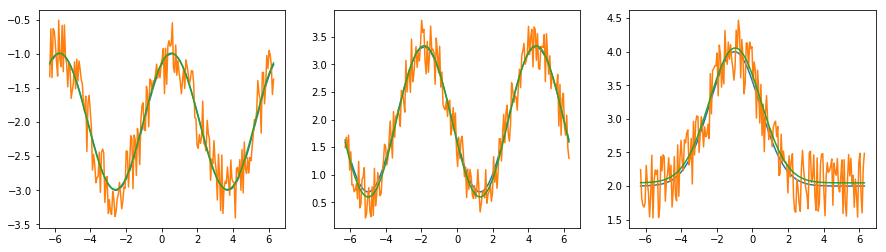

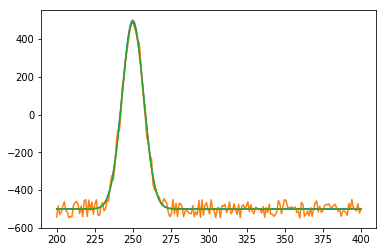

In [2]:
# example of Fitting

from scipy.optimize import curve_fit

_, plts = plt.subplots(ncols=3, figsize=(15, 4))

N = 200
x = np.linspace(-1, 1, N) * 2 * np.pi

def sin(x, a, b):
    return np.sin(x + a) + b

def sin_cos(x, a, b, c):
    return np.sin(x + a) + np.cos(x + b) + c

def gaussian(x, a, b, c, d):
    return a * np.exp(- (x - b) ** 2 / c ** 2) + d

data = {
    sin.__name__: sin(x, 1, -2),
    sin_cos.__name__: sin_cos(x, -2, 1, 2),
    gaussian.__name__: gaussian(x, 2, -1, 2, 2)
}

for i, f in enumerate([sin, sin_cos, gaussian]):
    y = data[f.__name__]
    plts[i].plot(x, y)
    noise_y = y + (np.random.random(N) - 0.5)
    plts[i].plot(x, noise_y)
    p, _ = curve_fit(f, x, noise_y)
    plts[i].plot(x, f(x, *p))


x = np.linspace(200, 400, N)
_, ax = plt.subplots(figsize=(6, 4))
y = gaussian(x, 1000, 250, 10, -500)
noise_y = y + (np.random.random(N) * 100) - 50
ax.plot(x, y)
ax.plot(x, noise_y)
# p, _ = curve_fit(gaussian, x, noise_y) => failed to fit

a = np.amax(noise_y) - np.amin(noise_y)
b = x[np.where(noise_y == np.amax(noise_y))[0][0]]
c = 1
d = np.amin(noise_y)

p, _ = curve_fit(gaussian, x, noise_y, p0=[a, b, c, d])
ax.plot(x, gaussian(x, *p))